┌ Info: Saved animation to 
│   fn = /data/GitHub/mine/maths/julia-scripts/Chaos/Lorenz/tmp.gif
└ @ Plots /home/fusion809/.julia/packages/Plots/ZVLhV/src/animation.jl:104


Plots.AnimatedGif("/data/GitHub/mine/maths/julia-scripts/Chaos/Lorenz/tmp.gif")
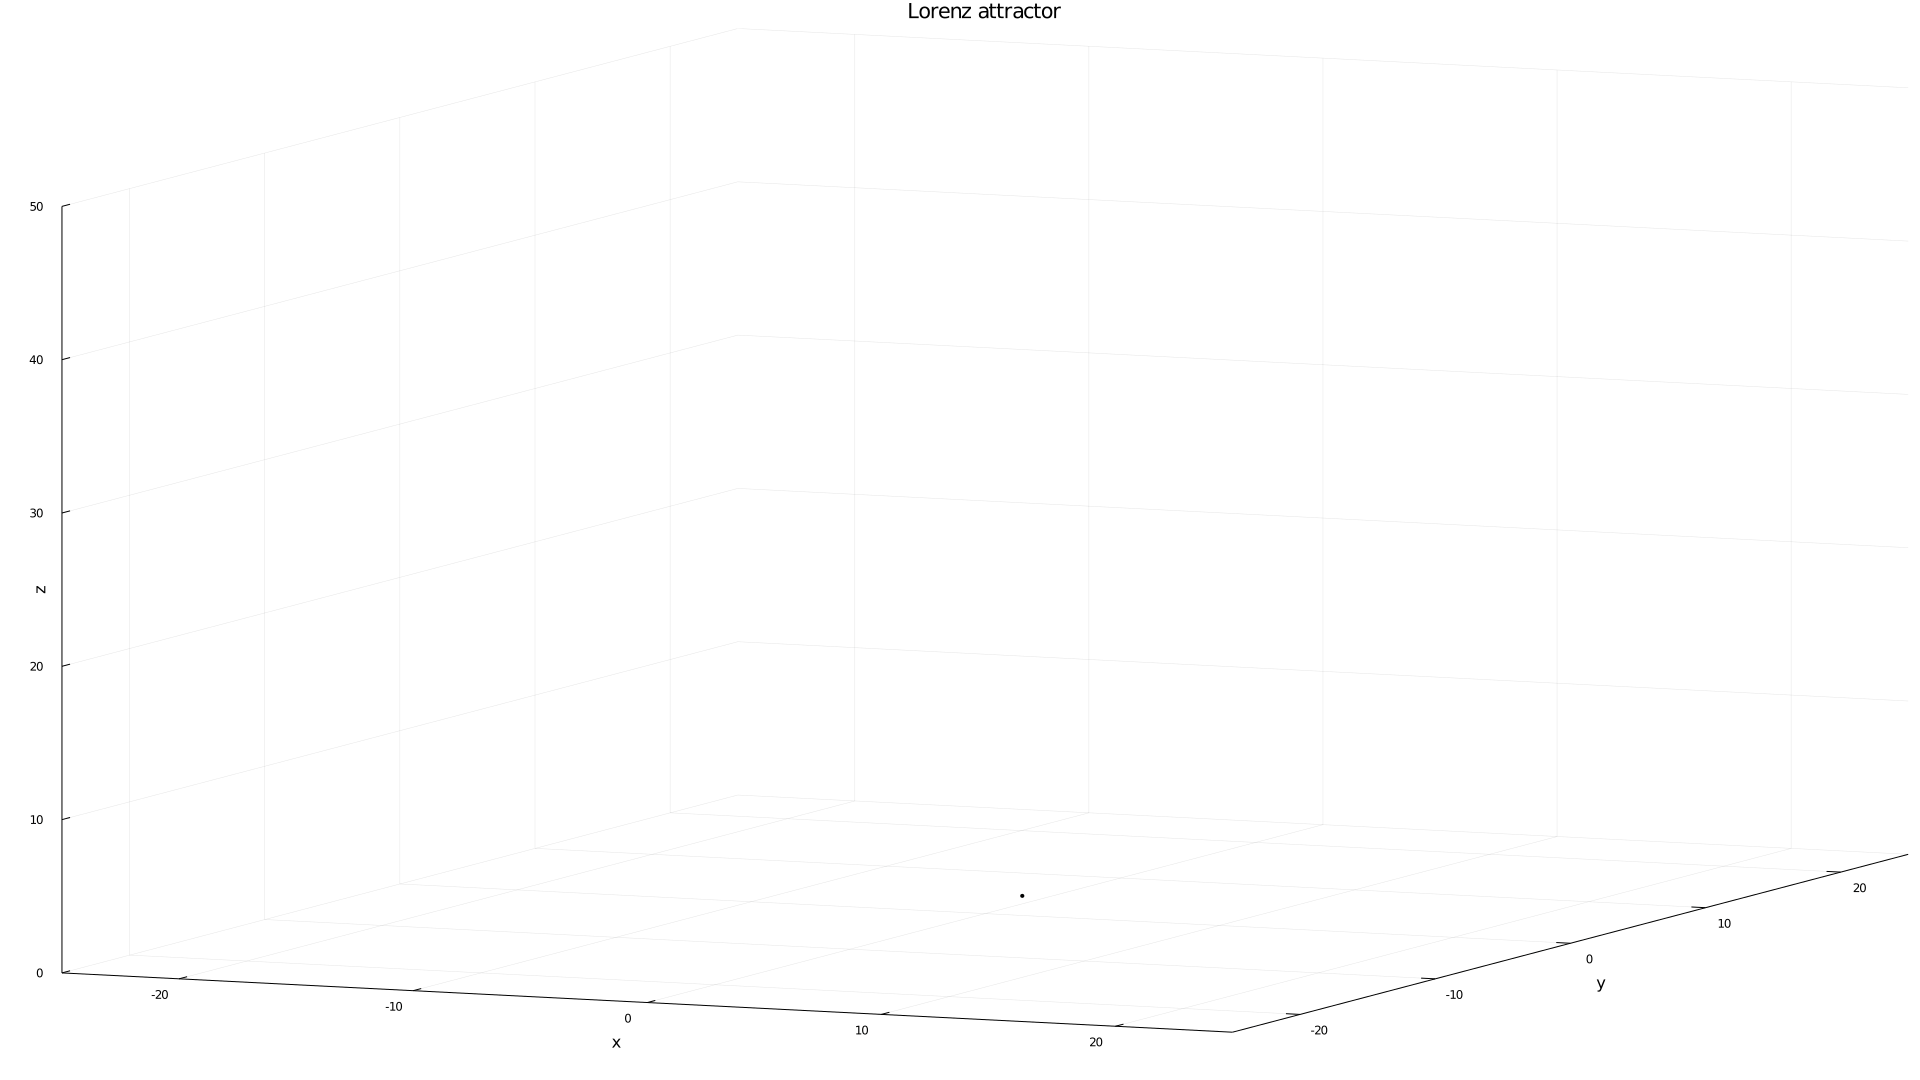

In [14]:
# This is partly copied from code in the docs:
# http://docs.juliaplots.org/latest/ (Author: Thomas Breloff)
# The original code used Euler's method to solve the problem, my
# code uses the fourth order Runge-Kutta method
# Import plots module
using Plots;

# Create the Lorenz structure
mutable struct Lorenz
    dt; σ; ρ; β; x; y; z
end

# Define the lorenz function
function lorenz(beta,rho,sigma,x,y,z)
    dx_dt=sigma*(y-x);
    dy_dt=x*(rho-z)-y;
    dz_dt=x*y-beta*z;
    
    return dx_dt, dy_dt, dz_dt
end

# This function uses the fourth-order Runge-Kutta method to
# approximate the differences in x, y, z in each step used
# in the animation.
function RK4(beta,rho,sigma,dt,x,y,z)
    K1=dt.*lorenz(beta,rho,sigma,x,y,z);
    k1=K1[1];
    l1=K1[2];
    m1=K1[3];
    K2=dt.*lorenz(beta,rho,sigma,x+k1/2,y+l1/2,z+m1/2);
    k2=K2[1];
    l2=K2[2];
    m2=K2[3];
    K3=dt.*lorenz(beta,rho,sigma,x+k2/2,y+l2/2,z+m2/2);
    k3=K3[1];
    l3=K3[2];
    m3=K3[3];
    K4=dt.*lorenz(beta,rho,sigma,x+k3,y+l3,z+m3);
    k4=K4[1];
    l4=K4[2];
    m4=K4[3];
    
    dx = 1/6*(k1+2*k2+2*k3+k4);
    dy = 1/6*(l1+2*l2+2*l3+l4);
    dz = 1/6*(m1+2*m2+2*m3+m4);
    return dx, dy, dz
end

function step!(l::Lorenz)
    diff = RK4(l.β,l.ρ,l.σ,l.dt,l.x,l.y,l.z)
    l.x += diff[1];
    l.y += diff[2];
    l.z += diff[3];
end

N = 100000;
t0 = 0;
tf = 80;
h = (tf-t0)/N;
attractor = Lorenz((dt = h, σ = 10., ρ = 28., β = 8//3, x = 1., 
        y = 1., z = 1.)...)


# initialize a 3D plot with 1 empty series
plt = plot3d(1, xlim=(-25,25), ylim=(-25,25), zlim=(0,50),
                title = "Lorenz attractor", marker = 2, 
                xlabel="x", ylabel="y", zlabel="z",
                size=(1920,1080),
                label="")

# build an animated gif by pushing new points to the plot, saving
# every 50th frame
@gif for i=1:N
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 100

0.0008